Mean Squared Error: 25575332993.36854
R^2 Score: 0.38718040092136374
Model Accuracy: 38.72%


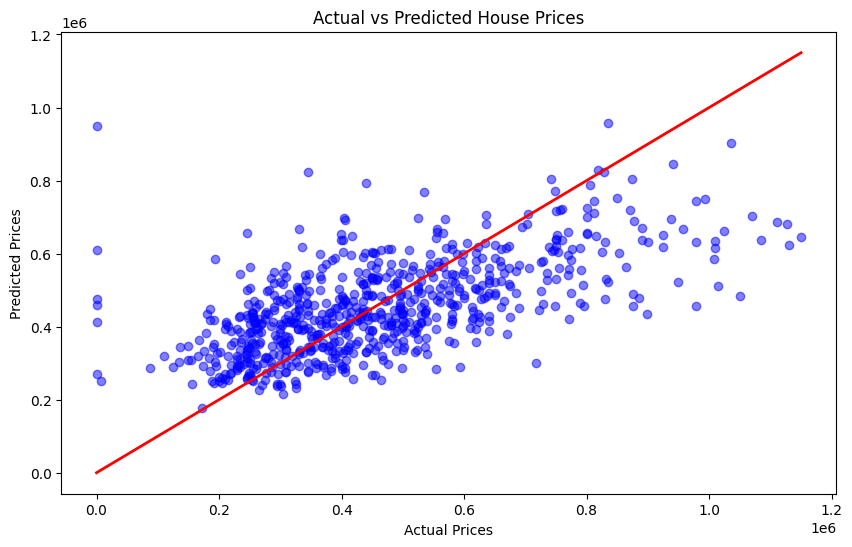

                 Coefficient
bedrooms       -42552.789811
bathrooms       44647.531856
sqft_living       120.630284
floors          56649.546634
waterfront     162214.730250
view            26597.986665
condition       16205.170310
sqft_above         70.739864
sqft_basement      49.890420
yr_built        -2133.423371
yr_renovated        0.553372


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv')

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers for the selected features
columns_with_outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
for column in columns_with_outliers:
    df = remove_outliers_iqr(df, column)

# Selecting features (independent variables) and the target (dependent variable)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
X = df[features]
y = df['price']  # Target variable (house price)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating mean squared error for the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Model evaluation using R^2 score
r2_score_value = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2_score_value}")

# Calculating accuracy in percentage
accuracy = r2_score_value * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Plotting the diagonal line (ideal predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Checking the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


Model Accuracy: 55.12%
Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.68      0.65       222
         Low       0.56      0.62      0.59       245
      Medium       0.45      0.37      0.40       246

    accuracy                           0.55       713
   macro avg       0.55      0.56      0.55       713
weighted avg       0.54      0.55      0.54       713



/home/sparkm/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


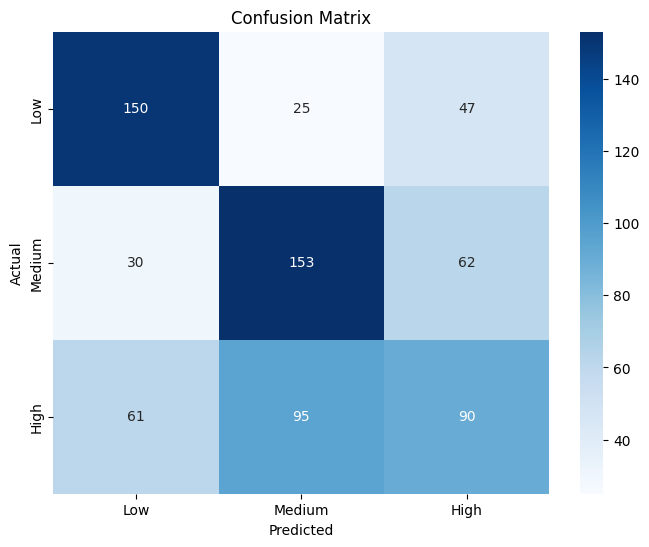

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data.csv')

# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers for the selected features
columns_with_outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
for column in columns_with_outliers:
    df = remove_outliers_iqr(df, column)

# Create categories for house prices based on percentiles
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Selecting features (independent variables) and the target (dependent variable)
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
X = df[features]
y = df['price_category']  # Target variable (categorized house price)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Logistic Regression model
model = LogisticRegression(max_iter=7500)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
